In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch
import torch.nn as nn
import pandas as pd

# 1. Define the Perceptron Function

In [2]:
class Perceptron(nn.Module):
    """ A Perceptron is one Linear layer """
    def __init__(self, input_dim):
        """
        Args:
            input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """The forward pass of the MLP
        Args:
            x_in (torch.Tensor): an input data tensor.
            x_in.shape should be (batch, input_dim)
        Returns:
            the resulting tensor. tensor.shape should be (batch, 1)
        """
        return torch.sigmoid(self.fc1(x_in))
    
perceptron = Perceptron(input_dim=2)

# 2. Data Generation

In [3]:
left_center  = (3, 3)
right_center = (3, -2)

In [4]:
def get_toy_data(batch_size, left_center=left_center, right_center=right_center):
    x_data = []
    y_targets = np.zeros(batch_size)
    for batch_i in range(batch_size):
        if np.random.random() > 0.5:
            x_data.append(np.random.normal(loc=left_center))
        else:
            x_data.append(np.random.normal(loc=right_center))
            y_targets[batch_i] = 1
    return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)

### Sample size = 20 

In [5]:
batch_size     = 30
x_data, y_data = get_toy_data(batch_size=batch_size)

/var/folders/6s/wxmy299j1592tl76rwp6kg3h0000gn/T/ipykernel_6625/1802577198.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1695391830591/work/torch/csrc/utils/tensor_new.cpp:264.)
  return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)


In [6]:
x_data

tensor([[ 2.9870, -2.1159],
        [ 5.2115,  2.7880],
        [ 1.8059,  1.1563],
        [ 0.6657,  3.3411],
        [ 3.3189, -0.8103],
        [ 1.9530, -1.1085],
        [ 3.3276, -2.0632],
        [ 1.9946,  4.4146],
        [ 1.6985,  4.0204],
        [ 2.8996,  3.1741],
        [ 3.7474,  1.5733],
        [ 1.4555,  3.7267],
        [ 3.6520, -0.9640],
        [ 1.6826, -2.5895],
        [ 1.9806, -2.5202],
        [ 3.5186, -1.7518],
        [ 3.9205, -2.9297],
        [ 2.8034, -2.2658],
        [ 5.5705, -1.6240],
        [ 4.0161,  2.1242],
        [ 3.3275, -1.6269],
        [ 1.9290,  1.3478],
        [ 2.5401, -2.2868],
        [ 2.6578,  4.3966],
        [ 4.1407, -0.5111],
        [ 2.8596,  2.6130],
        [ 1.7759, -1.7181],
        [ 3.7501, -0.4175],
        [ 2.5503,  3.0371],
        [ 2.1968, -3.4692]])

In [7]:
y_data

tensor([1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.])

# 3. Create the Contour Lines

### Turning the tensor data to arrays

In [8]:
n_classes=2
x_data    = x_data.numpy()
y_data    = y_data.numpy().astype(np.int32)

In [9]:
### all_x[0] stores the x coordinates for y=0 observations 
### all_x[1] stores the x coordinates for y=1 observations 

all_x = [[] for _ in range(n_classes)]
for x_i, y_i in zip(x_data,y_data):
    all_x[y_i].append(x_i)
    
all_x

[[array([5.211461 , 2.7879508], dtype=float32),
  array([1.8058863, 1.156267 ], dtype=float32),
  array([0.66567165, 3.341065  ], dtype=float32),
  array([1.9946182, 4.414614 ], dtype=float32),
  array([1.6985282, 4.020423 ], dtype=float32),
  array([2.8996081, 3.17414  ], dtype=float32),
  array([3.747432 , 1.5733197], dtype=float32),
  array([1.4555323, 3.7266657], dtype=float32),
  array([4.016105 , 2.1241968], dtype=float32),
  array([1.9290322, 1.347793 ], dtype=float32),
  array([2.6577723, 4.3965616], dtype=float32),
  array([2.8596265, 2.613038 ], dtype=float32),
  array([2.5503485, 3.0370507], dtype=float32)],
 [array([ 2.9870348, -2.1158502], dtype=float32),
  array([ 3.3189335, -0.810321 ], dtype=float32),
  array([ 1.9530416, -1.1085159], dtype=float32),
  array([ 3.3276408, -2.063221 ], dtype=float32),
  array([ 3.6520295 , -0.96403044], dtype=float32),
  array([ 1.6825824, -2.5895226], dtype=float32),
  array([ 1.9806161, -2.5202441], dtype=float32),
  array([ 3.5186498, 

In [10]:
all_x = [np.stack(x_list) for x_list in all_x]
all_x

[array([[5.211461  , 2.7879508 ],
        [1.8058863 , 1.156267  ],
        [0.66567165, 3.341065  ],
        [1.9946182 , 4.414614  ],
        [1.6985282 , 4.020423  ],
        [2.8996081 , 3.17414   ],
        [3.747432  , 1.5733197 ],
        [1.4555323 , 3.7266657 ],
        [4.016105  , 2.1241968 ],
        [1.9290322 , 1.347793  ],
        [2.6577723 , 4.3965616 ],
        [2.8596265 , 2.613038  ],
        [2.5503485 , 3.0370507 ]], dtype=float32),
 array([[ 2.9870348 , -2.1158502 ],
        [ 3.3189335 , -0.810321  ],
        [ 1.9530416 , -1.1085159 ],
        [ 3.3276408 , -2.063221  ],
        [ 3.6520295 , -0.96403044],
        [ 1.6825824 , -2.5895226 ],
        [ 1.9806161 , -2.5202441 ],
        [ 3.5186498 , -1.751843  ],
        [ 3.920495  , -2.9297028 ],
        [ 2.8034234 , -2.2657547 ],
        [ 5.5704627 , -1.6239905 ],
        [ 3.3275433 , -1.626911  ],
        [ 2.5401394 , -2.286839  ],
        [ 4.1406703 , -0.5110934 ],
        [ 1.7759105 , -1.7181116 ],
 

In [11]:
x_1_lim = (min([x_list[:,0].min() for x_list in all_x]), max([x_list[:,0].max() for x_list in all_x]))
x_2_lim = (min([x_list[:,1].min() for x_list in all_x]), max([x_list[:,1].max() for x_list in all_x]))

In [12]:
### the min and max for x1
x_1_lim

(0.66567165, 5.5704627)

In [13]:
### the min and max for x2
x_2_lim

(-3.4692118, 4.414614)

In [14]:
xx1 = np.linspace(x_1_lim[0], x_1_lim[1], 10)
xx2 = np.linspace(x_2_lim[0], x_2_lim[1], 10)

In [15]:
### Evenly spaced numbers over x_1_lim[0] and x_1_lim[1]
xx1

array([0.66567165, 1.21064843, 1.75562521, 2.300602  , 2.84557878,
       3.39055557, 3.93553235, 4.48050914, 5.02548592, 5.5704627 ])

In [16]:
### Evenly spaced numbers over x_2_lim[0] and x_2_lim[1]
xx2

array([-3.46921182, -2.59323115, -1.71725048, -0.84126981,  0.03471086,
        0.91069153,  1.78667219,  2.66265286,  3.53863353,  4.4146142 ])

In [17]:
XX1, XX2 = np.meshgrid(xx1, xx2)

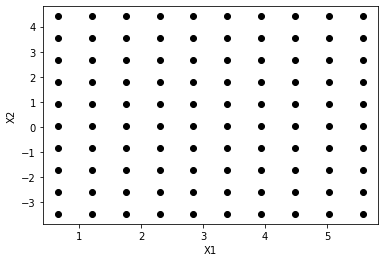

In [18]:
### A list of coordinate matrices from coordinate vectors.
plt.plot(XX1, XX2, marker='o', color='k', linestyle='none')
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [19]:
### coordinates for XX1, XX2, from left bottom corner to right top corner
x1x2 = np.vstack([XX1.ravel(), XX2.ravel()]).T
x1x2

array([[ 0.66567165, -3.46921182],
       [ 1.21064843, -3.46921182],
       [ 1.75562521, -3.46921182],
       [ 2.300602  , -3.46921182],
       [ 2.84557878, -3.46921182],
       [ 3.39055557, -3.46921182],
       [ 3.93553235, -3.46921182],
       [ 4.48050914, -3.46921182],
       [ 5.02548592, -3.46921182],
       [ 5.5704627 , -3.46921182],
       [ 0.66567165, -2.59323115],
       [ 1.21064843, -2.59323115],
       [ 1.75562521, -2.59323115],
       [ 2.300602  , -2.59323115],
       [ 2.84557878, -2.59323115],
       [ 3.39055557, -2.59323115],
       [ 3.93553235, -2.59323115],
       [ 4.48050914, -2.59323115],
       [ 5.02548592, -2.59323115],
       [ 5.5704627 , -2.59323115],
       [ 0.66567165, -1.71725048],
       [ 1.21064843, -1.71725048],
       [ 1.75562521, -1.71725048],
       [ 2.300602  , -1.71725048],
       [ 2.84557878, -1.71725048],
       [ 3.39055557, -1.71725048],
       [ 3.93553235, -1.71725048],
       [ 4.48050914, -1.71725048],
       [ 5.02548592,

In [20]:
### prediction (heights) for each points in x1x2
Z = perceptron(torch.tensor(x1x2, dtype=torch.float32)).detach().numpy().reshape(XX1.shape)
Z

array([[0.810482  , 0.7541396 , 0.6875053 , 0.61210054, 0.5309152 ,
        0.4480598 , 0.36799118, 0.2945938 , 0.2304969 , 0.17684959],
       [0.74012524, 0.6713479 , 0.59434485, 0.5124036 , 0.42979032,
        0.35091072, 0.27941403, 0.21760097, 0.16630651, 0.1251691 ],
       [0.65477467, 0.57633895, 0.49385795, 0.41170996, 0.33420384,
        0.26472282, 0.2052342 , 0.15627259, 0.11726808, 0.08699501],
       [0.55812806, 0.47532922, 0.39386487, 0.31790277, 0.25053552,
        0.19339648, 0.14673758, 0.10980317, 0.08127976, 0.05966918],
       [0.45686808, 0.37629855, 0.30203614, 0.23686361, 0.18208514,
        0.13768935, 0.10275817, 0.07590874, 0.05563972, 0.04054542],
       [0.35905153, 0.28662863, 0.22371507, 0.17129487, 0.12911467,
        0.09611636, 0.0708653 , 0.05186736, 0.03775555, 0.02737236],
       [0.27170113, 0.21109453, 0.16101813, 0.12099902, 0.08986084,
        0.06613296, 0.04833771, 0.0351506 , 0.02546485, 0.01839711],
       [0.19900344, 0.15124545, 0.1133271

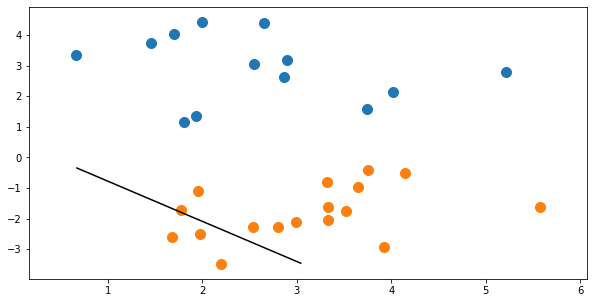

In [21]:
level = 0.5
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
margin=0.5
ax.set_xlim(x_1_lim[0]-margin,x_1_lim[1]+margin)
ax.set_ylim(x_2_lim[0]-margin,x_2_lim[1]+margin)
for x_list in all_x:
    ax.scatter(x_list[:,0],x_list[:,1], s=100)
    
ax.contour(XX1, XX2, Z, colors='k', levels=[level], linestyles=['-'])
plt.show()

In [22]:
### the numbers in the tables are predictions(heights)
### column names are the x1 coordinates
### index names are the x2 coordinates
df         = pd.DataFrame(Z)
df.columns = xx1
df.index   = xx2
df

,0.665672,1.210648,1.755625,2.300602,2.845579,3.390556,3.935532,4.480509,5.025486,5.570463
-3.469212,0.810482,0.754140,0.687505,0.612101,0.530915,0.448060,0.367991,0.294594,0.230497,0.176850
-2.593231,0.740125,0.671348,0.594345,0.512404,0.429790,0.350911,0.279414,0.217601,0.166307,0.125169
-1.717250,0.654775,0.576339,0.493858,0.411710,0.334204,0.264723,0.205234,0.156273,0.117268,0.086995
-0.841270,0.558128,0.475329,0.393865,0.317903,0.250536,0.193396,0.146738,0.109803,0.081280,0.059669
0.034711,0.456868,0.376299,0.302036,0.236864,0.182085,0.137689,0.102758,0.075909,0.055640,0.040545
0.910692,0.359052,0.286629,0.223715,0.171295,0.129115,0.096116,0.070865,0.051867,0.037756,0.027372
1.786672,0.271701,0.211095,0.161018,0.120999,0.089861,0.066133,0.048338,0.035151,0.025465,0.018397
2.662653,0.199003,0.151245,0.113327,0.083975,0.061696,0.045037,0.032719,0.023687,0.017104,0.012327
3.538634,0.141966,0.106083,0.078441,0.057538,0.041951,0.030451,0.022031,0.015900,0.011456,0.008244
4.414614,0.099250,0.073242,0.053644,0.039069,0.028335,0.020487,0.014780,0.010646,0.007659,0.005505


In [23]:
### Find the points that are close to the prespecified height level (0.5)
target_value = 0.5
tolerance    = 0.01
points = []
for column in df.columns:
    for index in df.index:
        value = df.loc[index, column]
        if abs(value - target_value) < tolerance:
            points.append((index, column))
points

[(-1.7172504795922174, 1.7556252148416307)]

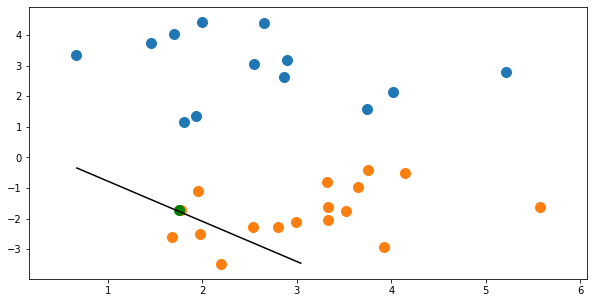

In [24]:
##### As seen, the contour lines is close to the line generated by the green points
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
margin=0.5
ax.set_xlim(x_1_lim[0]-margin,x_1_lim[1]+margin)
ax.set_ylim(x_2_lim[0]-margin,x_2_lim[1]+margin)
for x_list in all_x:
    ax.scatter(x_list[:,0],x_list[:,1], s=100)
ax.contour(XX1, XX2, Z, colors='k', levels=[0.5], linestyles=['-'])
for coord in points:
    y, x = coord
    ax.scatter(x, y, color='green',s=100)
plt.show()

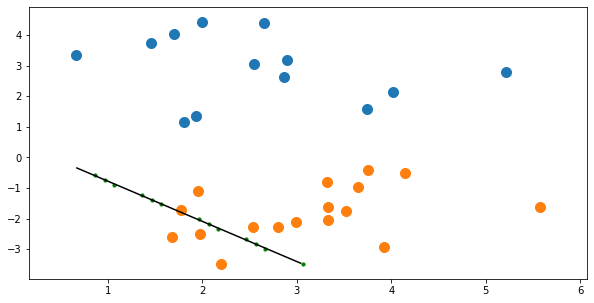

In [25]:
### when using a more granular for np.linspace
xx1 = np.linspace(x_1_lim[0], x_1_lim[1], 50)
xx2 = np.linspace(x_2_lim[0], x_2_lim[1], 50)
XX1, XX2 = np.meshgrid(xx1, xx2)
x1x2 = np.vstack([XX1.ravel(), XX2.ravel()]).T
Z = perceptron(torch.tensor(x1x2, dtype=torch.float32)).detach().numpy().reshape(XX1.shape)
df         = pd.DataFrame(Z)
df.columns = xx1
df.index   = xx2
### Find the points that are close to the prespecified height level (0.5)
target_value = 0.5
tolerance    = 0.005
points = []
for column in df.columns:
    for index in df.index:
        value = df.loc[index, column]
        if abs(value - target_value) < tolerance:
            points.append((index, column))
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
margin=0.5
ax.set_xlim(x_1_lim[0]-margin,x_1_lim[1]+margin)
ax.set_ylim(x_2_lim[0]-margin,x_2_lim[1]+margin)
for x_list in all_x:
    ax.scatter(x_list[:,0],x_list[:,1], s=100)
ax.contour(XX1, XX2, Z, colors='k', levels=[0.5], linestyles=['-'])
for coord in points:
    y, x = coord
    ax.scatter(x, y, color='green',s=10)
plt.show()